# Business Case: Jamboree Education - Linear Regression

<font color = 'green'> **_Shailendra Pratap Singh - DSML Dec'22 MWF_**

**Context**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

**How can you help here?**

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

**Dataset:**

Dataset Link: <a href = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv'>jamboree_admission.csv

**Column Profiling:**

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

**Concept Used:**

* Exploratory Data Analysis
* Linear Regression

**What does good looks like?**

* Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
* Drop the unique row Identifier if you see any. This step is important as you don’t want your model to build some understanding based on row numbers.
* Use Non-graphical and graphical analysis for getting inferences about variables.
    * This can be done by checking the distribution of variables of graduate applicants.
* Once you’ve ensured that students with varied merit apply for the university, you can start understanding the relationship between different factors responsible for graduate admissions.
* Check correlation among independent variables and how they interact with each other.
* Use Linear Regression from (Statsmodel library) and explain the results.
* Test the assumptions of linear regression:
    * Multicollinearity check by VIF score
    * Mean of residuals
    * Linearity of variables (no pattern in residual plot)
    * Test for Homoscedasticity
    * Normality of residuals
* Do model evaluation- MAE, RMSE, R2 score, Adjusted R2.
* Provide actionable Insights & Recommendations
* Try out different Linear Regressions

**Evaluation Criteria (100 Points):**

1. **Define Problem Statement and perform Exploratory Data Analysis (10 points)**
    * Definition of problem (as per given problem statement with additional views)
    * Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
    * Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
    * Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
    * Illustrate the insights based on EDA
        * Comments on range of attributes, outliers of various attributes
        * Comments on the distribution of the variables and relationship between them
        * Comments for each univariate and bivariate plots

2. **Data Preprocessing (10 Points)**
    * Duplicate value check
    * Missing value treatment
    * Outlier treatment
    * Feature engineering
    * Data preparation for modeling

3. **Model building (10 Points)** 
    * Build the Linear Regression model and comment on the model statistics
    * Display model coefficients with column names
    * Try out Ridge and Lasso regression

4. **Testing the assumptions of the linear regression model (50 Points)**
    * Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) (10 Points)
    * The mean of residuals is nearly zero (10 Points)
    * Linearity of variables (no pattern in the residual plot) (10 Points)
    * Test for Homoscedasticity (10 Points)
    * Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) (10 Points)
5. **Model performance evaluation (10 Points)**
    * Metrics checked - MAE, RMSE, R2, Adj R2
    * Train and test performances are checked
    * Comments on the performance measures and if there is any need to improve the model or not

6. **Actionable Insights & Recommendations (10 Points)**
    * Comments on significance of predictor variables
    * Comments on additional data sources for model improvement, model implementation in real world, potential business benefits from improving the model (These are key to differentiating a good and an excellent solution)

# Importing Libraries

In [55]:
## Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import make_pipeline

import warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [56]:
# Importing the Dataset
jb = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')
jb.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [57]:
## Creating a copy of the dataframe
df = jb.copy()

In [58]:
## Dropping the unique row Identifier as it's not required
df.drop(columns = ['Serial No.'], inplace = True)

**We have a small dataset with 500 rows.**

# 1. Problem Statement and Exploratory Data Analysis

    a. Definition of problem (as per given problem statement with additional views)
    b. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.
    c. Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
    d. Bivariate Analysis (Relationships between important variables
    e. Illustrate the insights based on EDA
        i. Comments on range of attributes, outliers of various attributes
        ii. Comments on the distribution of the variables and relationship between them
        iii. Comments for each univariate and bivariate plots

## 1.1 Problem Statement

<font color = darkcyan size=3>

**_To understand the factors important in graduate admissions and how these factors are interrelated among themselves. To build a predictive model which help finding one's chances of admission in a IVY League collage._**

## 1.2 Exploratory Data Analysis

**Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.**

In [59]:
# shape of dataset
df.shape

(500, 8)

In [60]:
# Getting basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [61]:
## Statstical summary of the dataset
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Conversion of categorical attributes to 'category'**

In [62]:
df[['University Rating', 'SOP', 'LOR ', 'Research']] = df[['University Rating', 'SOP', 'LOR ', 'Research']].astype('category')

**Datatypes**

In [63]:
## Datatypes
df.dtypes

GRE Score               int64
TOEFL Score             int64
University Rating    category
SOP                  category
LOR                  category
CGPA                  float64
Research             category
Chance of Admit       float64
dtype: object

In [64]:
## Getting the Numerical columns
num_col = df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')]
num_col

Index(['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit '], dtype='object')

In [65]:
## Getting the Categorical columns
cat_col = df.columns[df.dtypes == 'category']
cat_col

Index(['University Rating', 'SOP', 'LOR ', 'Research'], dtype='object')

**Missing Values Detection**

In [66]:
## Percentage Missing values in each column 
df.isnull().mean()

GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

*****************************************************************************************************
*****************************************************************************************************

<font color = darkcyan > **Observations**

    
<b>

    1. The dataset consists of 500 rows with seven features.
    2. We have both Numerical and Categorical predictors/features. 
    3. The target variable (Chance of Admit) is numerical.
    4. There are no missing values in the dataset.
    5. The mean and the Median of the numerical features are close.
</b>

*****************************************************************************************************
*****************************************************************************************************

### Unique Values

In [67]:
## Unique values in each columns
uni_cnt = pd.DataFrame(columns= ['Variables', 'Unique Values'])
for i in df.columns:
    uni_cnt.loc[len(uni_cnt.index)] = [i, df[i].nunique()]
uni_cnt

,Variables,Unique Values
0,GRE Score,49
1,TOEFL Score,29
2,University Rating,5
3,SOP,9
4,LOR,9
5,CGPA,184
6,Research,2
7,Chance of Admit,61


In [68]:
## getting an array of columns in the dataset 
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

### Value Counts

In [69]:
## Getting the value counts and Proportions for categorical columns
for i in cat_col:
    print("Value counts and Proportions of "+i, "\n")
    print(pd.DataFrame({
        "Count": df[i].value_counts(),
        "Proportion": df[i].value_counts(normalize=True).round(2)
    }))
    print("*"*50)

Value counts and Proportions of University Rating 

                   Count  Proportion
University Rating                   
3                    162        0.32
2                    126        0.25
4                    105        0.21
5                     73        0.15
1                     34        0.07
**************************************************
Value counts and Proportions of SOP 

     Count  Proportion
SOP                   
4.0     89        0.18
3.5     88        0.18
3.0     80        0.16
2.5     64        0.13
4.5     63        0.13
2.0     43        0.09
5.0     42        0.08
1.5     25        0.05
1.0      6        0.01
**************************************************
Value counts and Proportions of LOR  

      Count  Proportion
LOR                    
3.0      99        0.20
4.0      94        0.19
3.5      86        0.17
4.5      63        0.13
2.5      50        0.10
5.0      50        0.10
2.0      46        0.09
1.5      11        0.02
1.0       1      

In [70]:
# Summary of the categorical variables
df.describe(include='category')

,University Rating,SOP,LOR,Research
count,500,500.0,500.0,500
unique,5,9.0,9.0,2
top,3,4.0,3.0,1
freq,162,89.0,99.0,280


In [71]:
# Summary of numerical variables
df.describe()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,8.576440,0.72174
std,11.295148,6.081868,0.604813,0.14114
min,290.000000,92.000000,6.800000,0.34000
25%,308.000000,103.000000,8.127500,0.63000
50%,317.000000,107.000000,8.560000,0.72000
75%,325.000000,112.000000,9.040000,0.82000
max,340.000000,120.000000,9.920000,0.97000


## Univariate Analysis
    Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

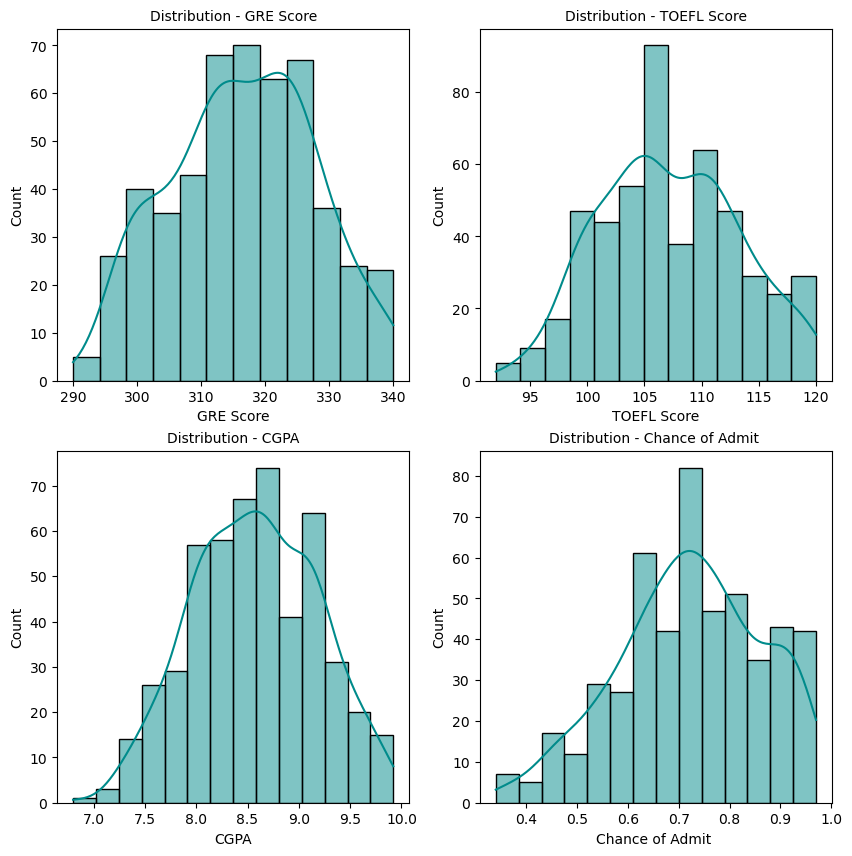

In [72]:
# Getting the distribution of numerical variables
fig= plt.figure(figsize=(10,6))
fig.subplots_adjust(top = 1.4)
i=1
for col in num_col:
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True, color= 'darkcyan')
    plt.title(f"Distribution - {col}", fontsize=10)
    i+=1

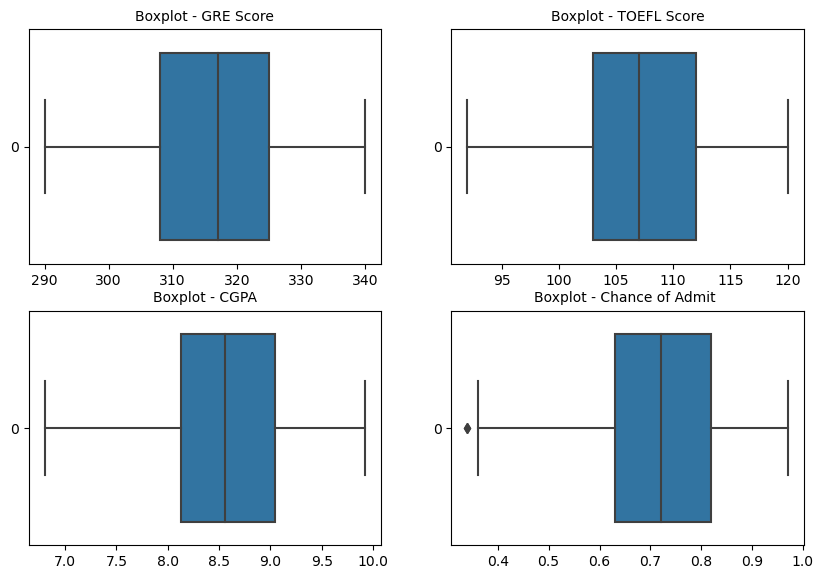

In [73]:
## Distribution and Outliers detection
fig = plt.figure(figsize=(10,4))
fig.subplots_adjust(top = 1.4)
i=1
for col in num_col:
    plt.subplot(2,2,i)
    sns.boxplot(df[col], orient='h')
    plt.title(f"Boxplot - {col}", fontsize=10)
    i+=1

*****************************************************************************************************
*****************************************************************************************************

<font color = darkcyan > **Observations**

    
<b>

    1. We don't have Outliers in the dataset.
    2. The distribution of the numerical feature is normally distributed.
</b>

*****************************************************************************************************
*****************************************************************************************************

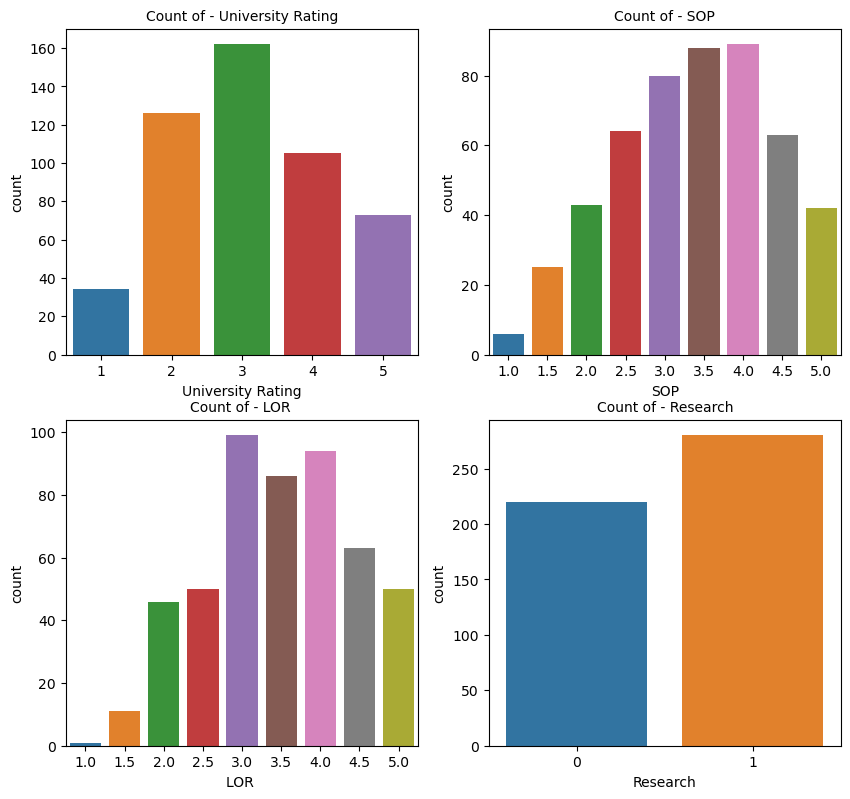

In [74]:
## Countplot of categorical variables
fig = plt.figure(figsize=(10,3))
fig.subplots_adjust(top = 2.5)
i=1
for col in cat_col:
    plt.subplot(2,2,i)
    ax = sns.countplot(x=df[col])
    plt.title(f"Count of - {col}", fontsize=10)
    i+=1

## Bivariate Analysis
    Bivariate Analysis (Relationships between important variables

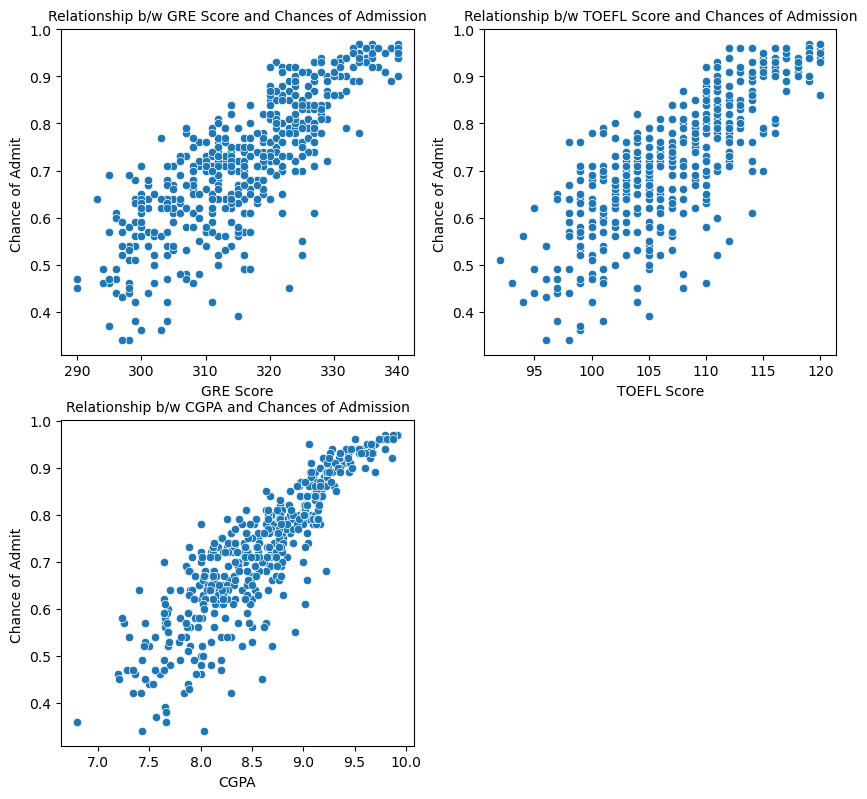

In [75]:
## Association among numerical variables
fig = plt.figure(figsize=(10,3))
fig.subplots_adjust(top = 2.5)
i=1
for col in num_col[:-1]:
    plt.subplot(2,2,i)
    ax = sns.scatterplot(x=df[col], y=df["Chance of Admit "])
    plt.title(f"Relationship b/w {col} and Chances of Admission", fontsize=10)
    i+=1

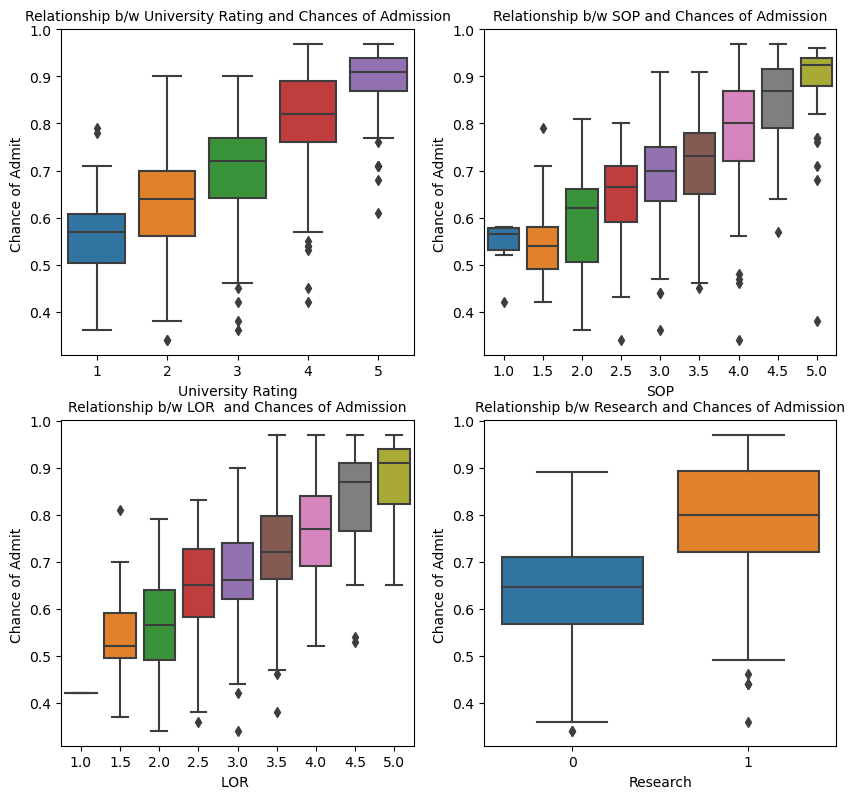

In [76]:
# Assosiation of categorical variables with the Target variable (chance of admit)
fig = plt.figure(figsize=(10,3))
fig.subplots_adjust(top = 2.5)
i=1
for col in cat_col:
    plt.subplot(2,2,i)
    ax = sns.boxplot(x=df[col], y=df["Chance of Admit "])
    plt.title(f"Relationship b/w {col} and Chances of Admission", fontsize=10)
    i+=1

*****************************************************************************************************
*****************************************************************************************************

<font color = darkcyan > **Observations**

    
<b>

    1. There is a linear relationship between the numerical features and the target.
    2. There is a higher probability of getting admission (Chance of Admit) with a good LOR,  good SOP, good University Rating, and having Research. 
</b>

*****************************************************************************************************
*****************************************************************************************************

## Multivariate Analysis

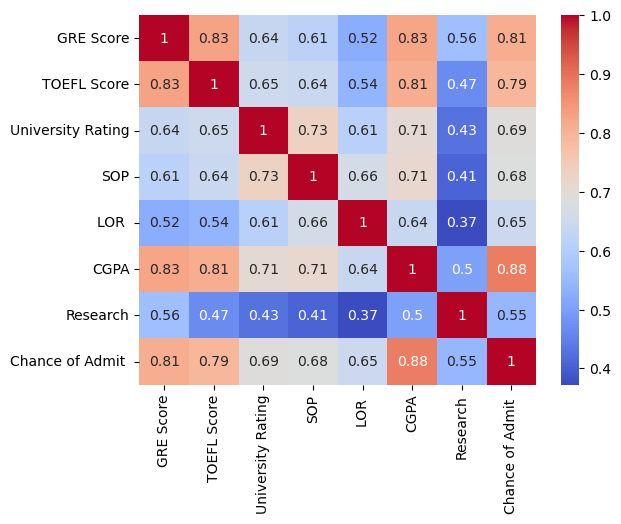

In [77]:
# Heatmap of correlation
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

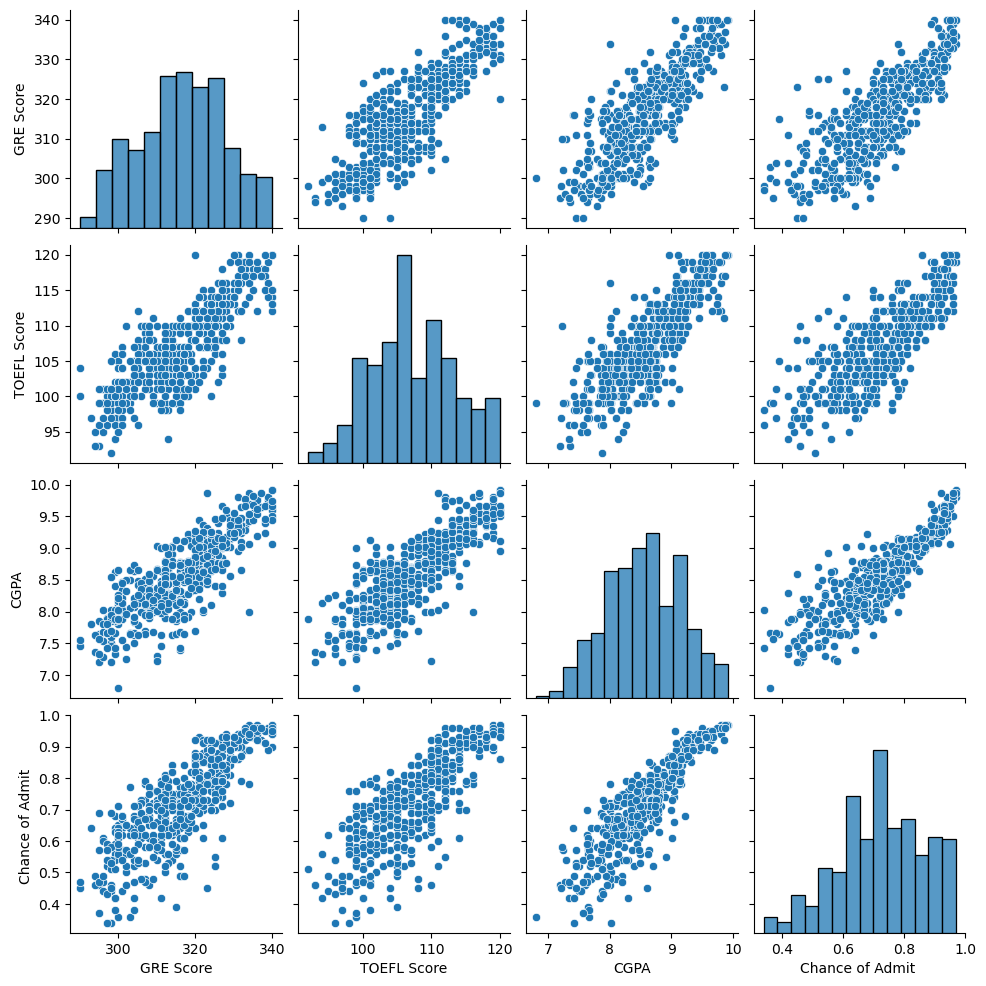

In [78]:
## Pairplot
sns.pairplot(df[num_col])
plt.show()

*****************************************************************************************************
*****************************************************************************************************

<font color = darkcyan > **Observations**

    
<b>

    1. The features are correlated with the target variables.
    2. There is linear association among the numnerical feature themselve as well
    3. There is a linear relationship between features and the target.
</b>

*****************************************************************************************************
*****************************************************************************************************

# 2. Data Preprocessing (10 Points)
    a. Duplicate value check
    b. Missing value treatment
    c. Outlier treatment
    d. Feature engineering
    e. Data preparation for modeling

In [79]:
df1 = df.copy()
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [80]:
# #duplicates
df1.duplicated().sum()

0

In [81]:
# Statmodels implementation of Linear regression
# Split the columns into y and X

X = df1[df1.columns.drop('Chance of Admit ')]
y = df1["Chance of Admit "]

In [82]:
## training and testing split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
print(f"Training Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")

Training Data Shape: (375, 7)
Test Data Shape: (125, 7)


In [83]:
## Scaling the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((375, 7), (125, 7))

# 3. Model building
- Build the Linear Regression model and comment on the model statistics
- Display model coefficients with column names
- Try out Ridge and Lasso regression

## Linear Regression Model
As the target variable is numerical in nature, we will try to fit a linear regression model

In [84]:
# adding intercept by adding constant
X_sm = sm.add_constant(X_train_scaled)
X_sm_test = sm.add_constant(X_test_scaled)

In [85]:
# Define and fit the Linear Regression model
sm_model = sm.OLS(y_train, X_sm).fit()

In [86]:
# print the model summary
print(sm_model.summary(xname=['Intercept'] + list(df.columns.drop(['Chance of Admit ']))))

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     256.7
Date:                Sun, 24 Dec 2023   Prob (F-statistic):          3.57e-137
Time:                        18:05:52   Log-Likelihood:                 533.85
No. Observations:                 375   AIC:                            -1052.
Df Residuals:                     367   BIC:                            -1020.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7221      0.00

## Using sklearn library

In [87]:
sk_model = LinearRegression()
sk_model.fit(X_train_scaled, y_train)

LinearRegression()

In [88]:
weights = [('Intercept', sk_model.intercept_)]+list(zip(X_train.columns,sk_model.coef_))

In [89]:
weights= pd.DataFrame(weights, columns=['Features', 'Coef']).sort_values(by=['Coef'], ascending=False)
weights

,Features,Coef
0,Intercept,0.722107
6,CGPA,0.068731
1,GRE Score,0.023858
2,TOEFL Score,0.016953
5,LOR,0.016787
7,Research,0.013686
3,University Rating,0.005630
4,SOP,0.001727


In [90]:
def adj_r2(r2,n,k):
    return 1 - (((1-r2)*(n-1))/(n-k-1))

r2_train = sk_model.score(X_train_scaled, y_train)
r2_adj_train = adj_r2(r2_train, X_train.shape[0], X_train.shape[1])

print(f"R^2_train: {r2_train}\nAdj._R^2_train: {r2_adj_train}")

R^2_train: 0.8303887451339371
Adj._R^2_train: 0.8271536530792711


In [91]:
y_pred_train = sk_model.predict(X_train_scaled)
y_pred_test = sk_model.predict(X_test_scaled)

In [92]:
r2_test = sk_model.score(X_test_scaled, y_test)
r2_adj_test = adj_r2(r2_test, X_test.shape[0], X_test.shape[1])

print(f"R^2_test: {r2_test}\nAdj._R^2_test: {r2_adj_test}")

R^2_test: 0.7933967762314991
Adj._R^2_test: 0.7810358995957768


In [93]:
def evaluate_model(y_true, y_pred):
    '''
    Calculate and Return R^2, adj_R^2, mae, mse, rmse, mape
    '''
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    
    return (r2, mae, mse, rmse, mape)

In [94]:
print('Performance of Unseen/Test Set')
r2, mae, mse, rmse, mape = evaluate_model(y_test, y_pred_test)

n= X_test.shape[0]
k=X_test.shape[1]
adjR2 = adj_r2(r2,n,k)

print(f"R^2: {r2:.4f}")
print(f"Adj_R^2: {adjR2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")

Performance of Unseen/Test Set
R^2: 0.7934
Adj_R^2: 0.7810
MAE: 0.0460
MSE: 0.0040
RMSE: 0.0634
MAPE: 0.0728


*****************************************************************************************************
*****************************************************************************************************

<font color = darkcyan > **Observations**
    
<b>

    1. The coefficient of determination $R^2$ is 83% on the train set and 79% on the test set, depicting that the model cannot explain the variation effectively. It looks overfitted. Thus there is a scope of improvement.
    2. Durbin-Watson score is very close to 2, suggesting no autocorrelation.
    3. The model is fitted with a higher intercept value (0.72)

</b>

*****************************************************************************************************
*****************************************************************************************************

# 4. Testing the assumptions of linear regression model

* Multicollinearity by check by VIF score
* The mean of residuals is nearly zero
- Linearity of variables (no pattern in the residual plot) (10 Points)
- Test for Homoscedasticity (10 Points)
- Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) (10 Points)

## 1. Linearity

In [95]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


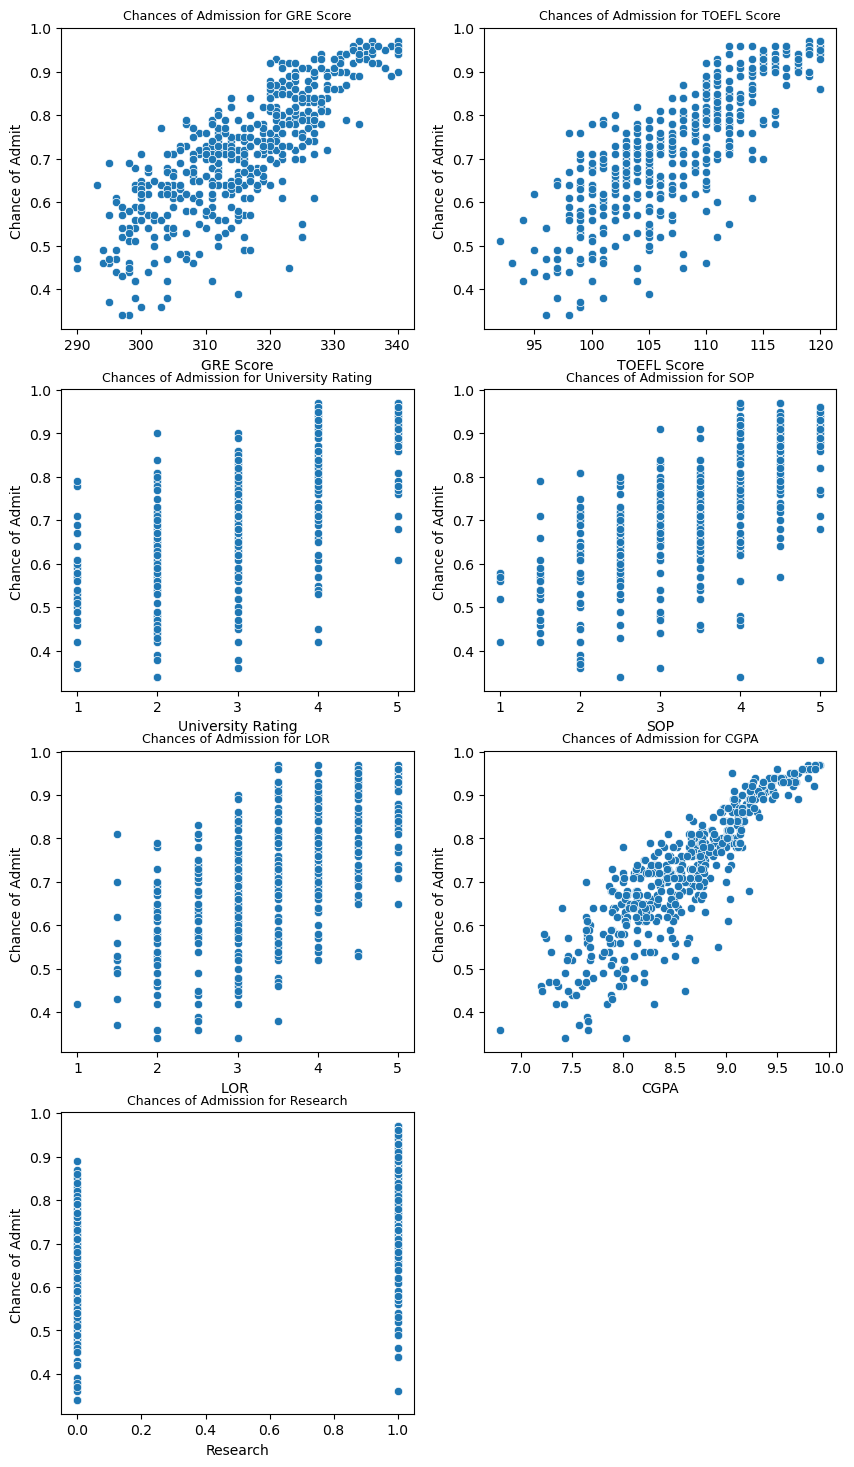

In [96]:
plt.figure(figsize=(10,18))
i=1
for col in df.columns.drop('Chance of Admit '):
    plt.subplot(4,2,i)
    fig = sns.scatterplot(x=df[col], y= df["Chance of Admit "])
    plt.title(f'Chances of Admission for {col}', fontsize=9)
    i+=1

## No Multicolinearity

In [97]:
df.corr().round(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.00,0.83,0.64,0.61,0.52,0.83,0.56,0.81
TOEFL Score,0.83,1.00,0.65,0.64,0.54,0.81,0.47,0.79
University Rating,0.64,0.65,1.00,0.73,0.61,0.71,0.43,0.69
SOP,0.61,0.64,0.73,1.00,0.66,0.71,0.41,0.68
LOR,0.52,0.54,0.61,0.66,1.00,0.64,0.37,0.65
CGPA,0.83,0.81,0.71,0.71,0.64,1.00,0.50,0.88
Research,0.56,0.47,0.43,0.41,0.37,0.50,1.00,0.55
Chance of Admit,0.81,0.79,0.69,0.68,0.65,0.88,0.55,1.00


<AxesSubplot:>

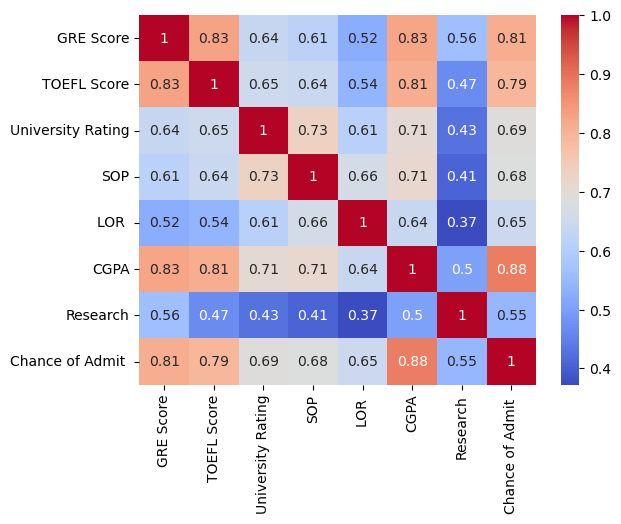

In [98]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [99]:
vif = pd.DataFrame() # blank dataframe to store VIF Values
X_t = pd.DataFrame(X_train_scaled, columns=X_train.columns) # add values and columns to dataframe
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.83
0,GRE Score,4.25
1,TOEFL Score,4.18
3,SOP,2.69
2,University Rating,2.60
4,LOR,2.06
6,Research,1.47


Let's check the performance of the model with features added one by one - stepwise regression

In [100]:
def sk_lr(X,y):
    '''
    returns a tuple of r2_train, r2_test, AdjR2_train, AdjR2_test, mae, mse, rmse, mape
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    sk_model = LinearRegression()
    sk_model.fit(X_tr_scaled, y_train)
    y_pred_train = sk_model.predict(X_tr_scaled)
    y_pred_test = sk_model.predict(X_test_scaled)
    
    r2_train = r2_score(y_train, y_pred_train )
    r2_test = r2_score(y_test, y_pred_test)
    AdjR2_train = adj_r2(r2_train, X_train.shape[0], X_train.shape[1])
    AdjR2_test = adj_r2(r2_test, X_test.shape[0], X_test.shape[1])    
    
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred_test)
    
    model_matrices = (r2_train, r2_test, AdjR2_train, AdjR2_test, mae, mse, rmse, mape)
    return model_matrices

In [101]:
print("Performance of the model (On test set) with features added one by one\n")

ordered_columns = ['CGPA','Research', 'SOP', 'LOR ', 'University Rating', 'GRE Score', 'TOEFL Score']
cols = []

for i in weights.Features[1:]:
    cols.append(i)
    X = df.loc[:,cols]
    y = df['Chance of Admit ']
    print(f"Features Included:{cols}")
    
    r2_train, r2_test, AdjR2_train, AdjR2_test, mae, mse, rmse, mape = sk_lr(X,y)

    print(f"Train Scores: R2: {r2_train:.4f}; adj_R2: {AdjR2_train:.4f}")

    print(f"Test Scores: R2: {r2_test:.4f}; adj_R2: {AdjR2_test:.4f}")

    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}")
    
    print("**"*50)

Performance of the model (On test set) with features added one by one

Features Included:['CGPA']
Train Scores: R2: 0.7824; adj_R2: 0.7818
Test Scores: R2: 0.7667; adj_R2: 0.7648
MAE: 0.0491
MSE: 0.0045
RMSE: 0.0674
MAPE: 0.0778
****************************************************************************************************
Features Included:['CGPA', 'GRE Score']
Train Scores: R2: 0.8065; adj_R2: 0.8055
Test Scores: R2: 0.7764; adj_R2: 0.7727
MAE: 0.0468
MSE: 0.0043
RMSE: 0.0659
MAPE: 0.0742
****************************************************************************************************
Features Included:['CGPA', 'GRE Score', 'TOEFL Score']
Train Scores: R2: 0.8110; adj_R2: 0.8094
Test Scores: R2: 0.7835; adj_R2: 0.7782
MAE: 0.0454
MSE: 0.0042
RMSE: 0.0649
MAPE: 0.0725
****************************************************************************************************
Features Included:['CGPA', 'GRE Score', 'TOEFL Score', 'LOR ']
Train Scores: R2: 0.8229; adj_R2: 0.8210
Test Sc

**Inference**

High correlation between independent variables can lead to multicollinearity issues in a linear regression model. A VIF score of around 4.5 is generally considered moderate, and a rule of thumb is that VIF values below 5 are acceptable. This suggests that the variance of the estimated regression coefficients is not inflated to a problematic extent due to multicollinearity.

Given the correlation of 0.83 between the two independent variables, it's somewhat high, indicating a strong linear relationship. However, the fact that the VIF scores are below 5 suggests that the multicollinearity is not severe.

**Conclusion**
1. CGPA,GRE Score, and TOEFL Scores are correlated in the dataset. Considering the practical significance of the correlation, as variables are conceptually distinct, I have decided to keep all these feature and not removing any of them.
2. Performance and Accuracy of the model is improving with added features

## Normality of Residuals

In [102]:
y_pred_train = sm_model.predict(X_sm)
y_pred_test = sm_model.predict(X_sm_test)
resid_train = y_train - y_pred_train
resid_test = y_test - y_pred_test

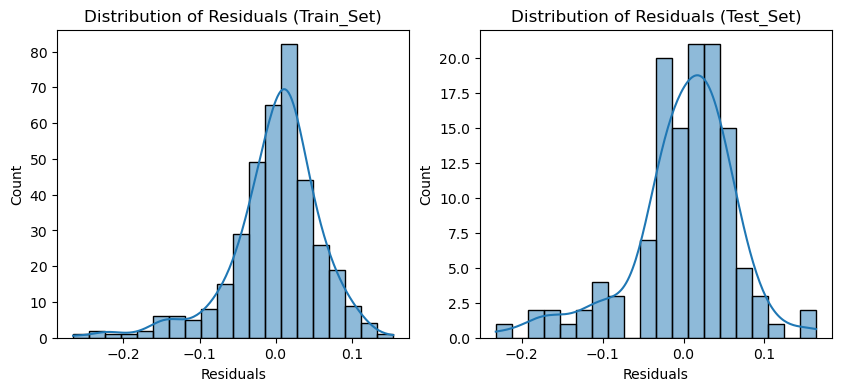

In [103]:
## Plotting the residual plot
fig=plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(resid_train, kde=True, bins=20)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals (Train_Set)")

plt.subplot(1,2,2)
sns.histplot(resid_test, kde=True, bins=20)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals (Test_Set)")
plt.show()

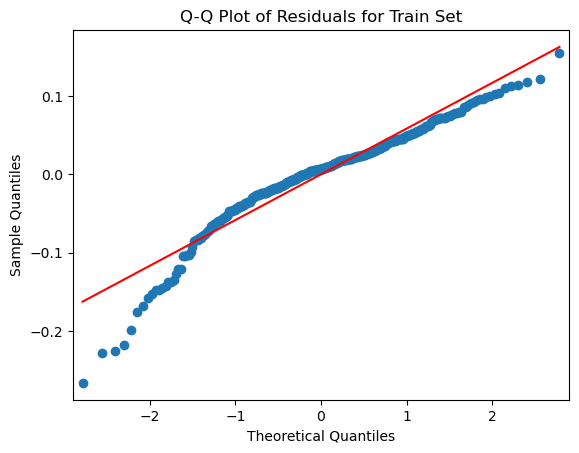

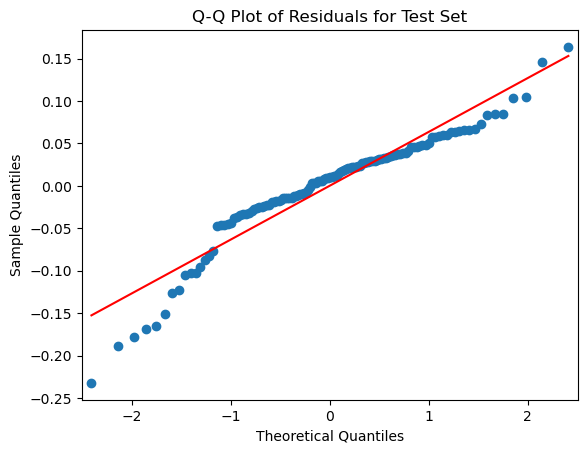

In [104]:
qqplot(resid_train,line="s")
plt.title('Q-Q Plot of Residuals for Train Set')
qqplot(resid_test,line="s")
plt.title('Q-Q Plot of Residuals for Test Set')
plt.show()

In [105]:
# H0: the data is normally distributed.
# Ha: the data isn't normally distributed
stat, pvalue = shapiro(resid_train)
pvalue

4.412685494781243e-12

In [106]:
# H0: the data is normally distributed.
# Ha: the data isn't normally distributed
stat, pvalue = shapiro(resid_test)
pvalue

2.745151732597151e-06

**Inferences**

* Residuals are not normally distributed and skewed towards the left

## Mean of residuals is nearly zero

In [107]:
np.mean(resid_train)

7.283063041541027e-17

In [108]:
np.mean(resid_test)

0.00030393664931548293

## Homoscadisticity

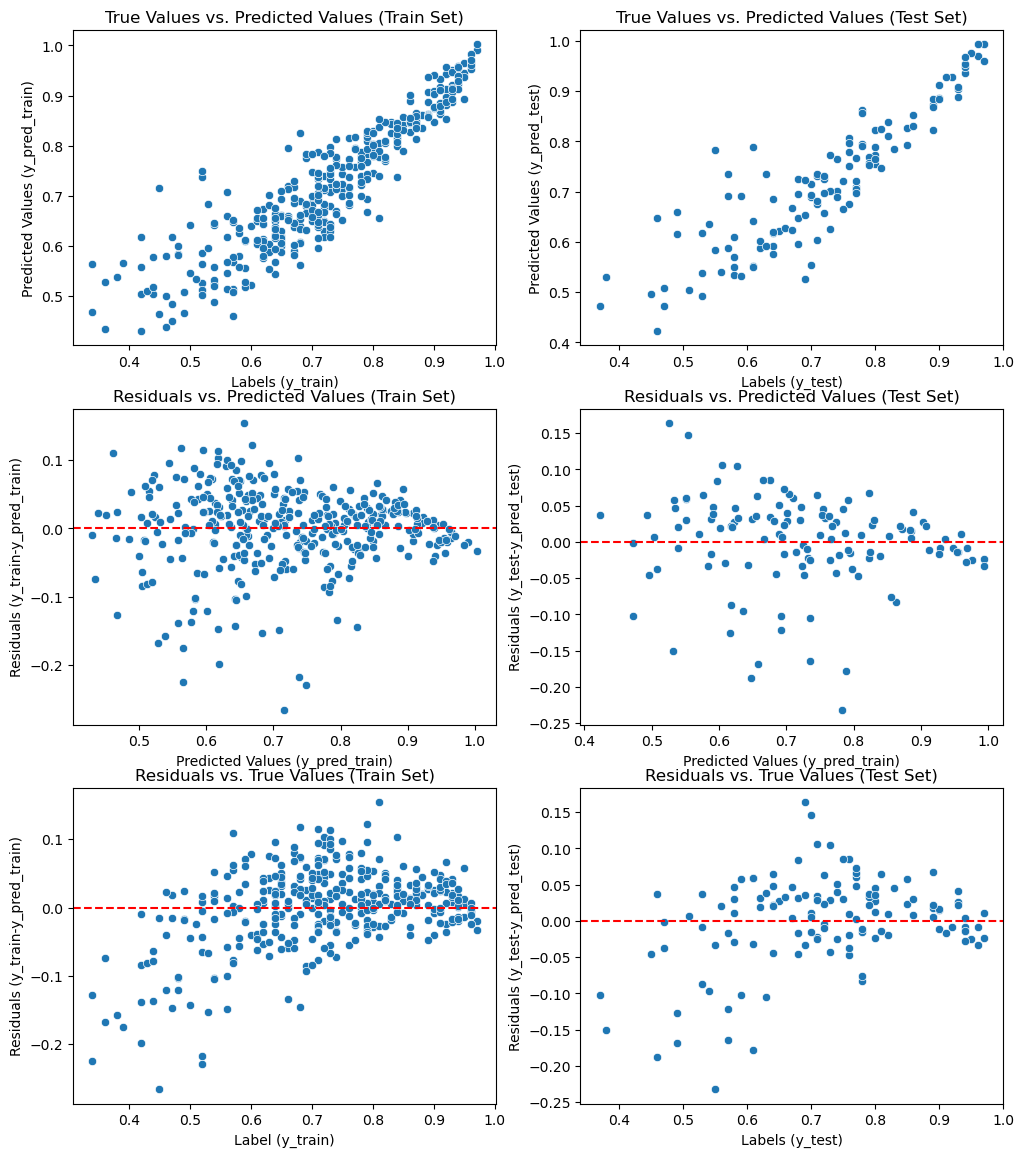

In [109]:
# Scatterplot of residuals against predicted values for homoscedasticity check
fig=plt.figure(figsize=(12,6))
fig.subplots_adjust(top = 1.9)

plt.subplot(3,2,1)
sns.scatterplot(x=y_train, y=y_pred_train);
plt.title('True Values vs. Predicted Values (Train Set)')
plt.ylabel('Predicted Values (y_pred_train)')
plt.xlabel('Labels (y_train)')

plt.subplot(3,2,3)
sns.scatterplot(x=y_pred_train,y=resid_train);
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values (Train Set)')
plt.xlabel('Predicted Values (y_pred_train)')
plt.ylabel('Residuals (y_train-y_pred_train)')

plt.subplot(3,2,5)
sns.scatterplot(x=y_train,y=resid_train);
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. True Values (Train Set)')
plt.xlabel('Label (y_train)')
plt.ylabel('Residuals (y_train-y_pred_train)')

plt.subplot(3,2,2)
sns.scatterplot(x= y_test, y=y_pred_test);
# plt.axhline(y=0, color='r', linestyle='--')
plt.title('True Values vs. Predicted Values (Test Set)')
plt.ylabel('Predicted Values (y_pred_test)')
plt.xlabel('Labels (y_test)')

plt.subplot(3,2,4)
sns.scatterplot(x=y_pred_test,y=resid_test);
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values (Test Set)')
plt.xlabel('Predicted Values (y_pred_train)')
plt.ylabel('Residuals (y_test-y_pred_test)')

plt.subplot(3,2,6)
sns.scatterplot(x=y_test,y=resid_test);
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. True Values (Test Set)')
plt.xlabel('Labels (y_test)')
plt.ylabel('Residuals (y_test-y_pred_test)')

plt.show()

In [110]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm)
list(zip(name, test))

[('F statistic', 1.052569423488267), ('p-value', 0.36585142944214355)]

In [111]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_test, X_sm_test)
list(zip(name, test))

[('F statistic', 1.3863241062549598), ('p-value', 0.11526990557413641)]

Null: Homoscedasticity

as P value not less than 0.05 we fail to reject to Null Hypothesis
(There is no significant evidance to reject null hypothesis)

- F Stats value close to Zero i.e. No Difference in variation among two sides
- P-Value <=0.95: Fail to reject Null hypothesis

*****************************************************************************************************
*****************************************************************************************************

<font color = darkcyan > **Observations**

<b>
    
    1. Linear relationship between Target and Features
    2. The features are correlated, there is a multicolinearity
    3. Mean of Residuals are nearly zero
    4. Residuals aren't distributed normally
    5. No hetroscadisticity
    
</b>

*****************************************************************************************************
*****************************************************************************************************

# 5. Model performance evaluation

In [112]:
#Make predictions
y_pred_train = sm_model.predict(X_sm)
y_pred_test = sm_model.predict(X_sm_test)

In [113]:
print('Performance of Train Set')
r2, mae, mse, rmse, mape = evaluate_model(y_train, y_pred_train)

n= X_train.shape[0]
k=X_train.shape[1]
adjR2 = adj_r2(r2,n,k)

print(f"R^2: {r2:.4f}")
print(f"Adj_R^2: {adjR2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")

Performance of Train Set
R^2: 0.8304
Adj_R^2: 0.8272
MAE: 0.0417
MSE: 0.0034
RMSE: 0.0583
MAPE: 0.0674


In [114]:
print('Performance of Test Set')
r2, mae, mse, rmse, mape = evaluate_model(y_test, y_pred_test)

n= X_test.shape[0]
k=X_test.shape[1]
adjR2 = adj_r2(r2,n,k)

print(f"R^2: {r2:.4f}")
print(f"Adj_R^2: {adjR2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")

Performance of Test Set
R^2: 0.7934
Adj_R^2: 0.7810
MAE: 0.0460
MSE: 0.0040
RMSE: 0.0634
MAPE: 0.0728


## Linear Regression Model with Polynomial Features

In [115]:
# Transform the features into polynomial features
degree = 5
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [116]:
for degree in range(1,6):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    poly_lr = LinearRegression()
    poly_lr.fit(X_train_poly,y_train)

    print("*"*50)
    print("Degree: ", degree)
    print("Train r2_score:",poly_lr.score(X_train_poly,y_train))
    print("Test r2_score:",poly_lr.score(X_test_poly,y_test))

**************************************************
Degree:  1
Train r2_score: 0.8303887451339371
Test r2_score: 0.793396776231499
**************************************************
Degree:  2
Train r2_score: 0.8486435146301254
Test r2_score: 0.7856808327700193
**************************************************
Degree:  3
Train r2_score: 0.8833354647865672
Test r2_score: 0.6677986455719216
**************************************************
Degree:  4
Train r2_score: 0.9762287910200167
Test r2_score: -13.792846697632369
**************************************************
Degree:  5
Train r2_score: 1.0
Test r2_score: -114.10974065887405


*****************************************************************************************************
*****************************************************************************************************

<font color = darkcyan > **Observations**
    
<b>

    1. The polynomial features aren't improving the model and overfits.

</b>

*****************************************************************************************************
*****************************************************************************************************

# Regularisation

## L1 Regularisation (Lasso Model)

In [117]:
X = df1[df1.columns.drop(['Chance of Admit '])]
y = df1['Chance of Admit ']

# Splitting the dataset into Train, validation, and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.175, random_state=42)

print('Splited Sets (%)')
print(f"Train Set: {(X_train.shape[0]/X.shape[0])}")
print(f"Val Set: {(X_val.shape[0]/X.shape[0])}")
print(f"Test Set: {(X_test.shape[0]/X.shape[0])}")

Splited Sets (%)
Train Set: 0.7
Val Set: 0.15
Test Set: 0.15


In [118]:
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]
train_scores = []
val_scores = []

for alpha in alpha_list:
    model = Lasso(alpha)
    reg_scaled = make_pipeline(StandardScaler(), model)
    reg_scaled.fit(X_train, y_train)
    train_score = reg_scaled.score(X_train, y_train)
    val_score = reg_scaled.score(X_val, y_val)


    train_scores.append(train_score)
    val_scores.append(val_score)

    print("*"*50)
    print("alpha:", alpha)
    print(f"Train r2_score: {reg_scaled.score(X_train,y_train):.4f}")
    print(f"Val r2_score:{reg_scaled.score(X_val,y_val):.4f}") 

**************************************************
alpha: 0.0001
Train r2_score: 0.8331
Val r2_score:0.7591
**************************************************
alpha: 0.001
Train r2_score: 0.8330
Val r2_score:0.7590
**************************************************
alpha: 0.01
Train r2_score: 0.8249
Val r2_score:0.7517
**************************************************
alpha: 0.1
Train r2_score: 0.2747
Val r2_score:0.2460
**************************************************
alpha: 1
Train r2_score: 0.0000
Val r2_score:-0.0069
**************************************************
alpha: 10
Train r2_score: 0.0000
Val r2_score:-0.0069


In [119]:
best_alpha = 0.0001

In [120]:
lasso_model = make_pipeline(StandardScaler(), Lasso(best_alpha))

In [121]:
lasso_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.0001))])

In [122]:
# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

In [123]:
r2, mae, mse, rmse, mape =  evaluate_model(y_test, y_pred_lasso)
adjR2 = adj_r2(r2, X_test.shape[0], X_test.shape[1])
print(f"R^2: {r2:.4f}")
print(f"Adj_R^2: {adjR2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")

R^2: 0.8227
Adj_R^2: 0.8042
MAE: 0.0437
MSE: 0.0040
RMSE: 0.0632
MAPE: 0.0717


### Cross Validation & Hyperparameter Tuning

In [124]:
X = df1[df1.columns.drop(['Chance of Admit '])]
y = df1['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Cross Validation using KFold

kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train): #iterating through the K-folds
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    print(X_train.shape,X_val.shape)

(340, 7) (85, 7)
(340, 7) (85, 7)
(340, 7) (85, 7)
(340, 7) (85, 7)
(340, 7) (85, 7)


In [125]:
# Transform the features into polynomial features
lasso = Lasso(0.0001)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lasso_pipe = make_pipeline(StandardScaler(), lasso)

# Evaluate the model using cross-validation
scores = cross_val_score(lasso_pipe, X, y, cv=kf, scoring='r2')

In [126]:
# Print the mean and standard deviation of scores
print("r2 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

r2 score: 0.81 (+/- 0.04)


In [127]:
X = df1[df1.columns.drop(['Chance of Admit '])]
y = df1['Chance of Admit ']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.175, random_state=42)

# Define a range of alpha values
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]

# Create a Lasso regression model
lasso = Lasso()

# Defining hyperparameter grid for Lasso regression
param_grid = {'alpha': alphas,
              'fit_intercept': [True, False]}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=KFold(n_splits=5), scoring='r2')
    
grid_search.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best alpha:", grid_search.best_params_)
print("Best cross-validation r2_score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

Best alpha: {'alpha': 0.0001, 'fit_intercept': True}
Best cross-validation r2_score: 0.8103256748941263


In [128]:
# Make predictions on new data
predictions_lasso = best_model.predict(X_test)

In [129]:
print("Unseen data r2_score:", r2_score(y_test,predictions_lasso))

Unseen data r2_score: 0.8202599950519626


In [130]:
print('Performance of Unseen/Test Set')
r2, mae, mse, rmse, mape = evaluate_model(y_test, predictions_lasso)

n= X_test.shape[0]
k=X_test.shape[1]
adjR2 = adj_r2(r2,n,k)

print(f"R^2: {r2:.4f}")
print(f"Adj_R^2: {adjR2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")

Performance of Unseen/Test Set
R^2: 0.8203
Adj_R^2: 0.8015
MAE: 0.0440
MSE: 0.0041
RMSE: 0.0636
MAPE: 0.0721


In [131]:
y_pred_train_lasso = best_model.predict(X_train)
y_pred_test_lasso = best_model.predict(X_test)
resid_train_lasso = y_train - y_pred_train_lasso
resid_test_lasso = y_test - y_pred_test_lasso

## L2 Regularisation (Ridge Model)

In [132]:
X = df1[df1.columns.drop(['Chance of Admit '])]
y = df1['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.175, random_state=42)

print('Splited Sets')
print(f"Train Set: {(X_train.shape[0]/X.shape[0])}")
print(f"Val Set: {(X_val.shape[0]/X.shape[0])}")
print(f"Test Set: {(X_test.shape[0]/X.shape[0])}")

Splited Sets
Train Set: 0.7
Val Set: 0.15
Test Set: 0.15


In [133]:
alpha_list = [ 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
val_scores = []

for alpha in alpha_list:
    model = Ridge(alpha)
    reg_scaled = make_pipeline(StandardScaler(), model)
    reg_scaled.fit(X_train, y_train)
    train_score = reg_scaled.score(X_train, y_train)
    val_score = reg_scaled.score(X_val, y_val)


    train_scores.append(train_score)
    val_scores.append(val_score)

    print("*"*50)
    print("alpha:", alpha)
    print(f"Train r2_score:{reg_scaled.score(X_train,y_train):.4f}")
    print(f"Val r2_score: {reg_scaled.score(X_val,y_val):.4f}")

**************************************************
alpha: 0.001
Train r2_score:0.8331
Val r2_score: 0.7590
**************************************************
alpha: 0.01
Train r2_score:0.8331
Val r2_score: 0.7590
**************************************************
alpha: 0.1
Train r2_score:0.8331
Val r2_score: 0.7590
**************************************************
alpha: 1
Train r2_score:0.8331
Val r2_score: 0.7591
**************************************************
alpha: 10
Train r2_score:0.8327
Val r2_score: 0.7592
**************************************************
alpha: 100
Train r2_score:0.8211
Val r2_score: 0.7504
**************************************************
alpha: 1000
Train r2_score:0.6888
Val r2_score: 0.6310


In [134]:
best_alpha = 1

In [135]:
ridge_model = make_pipeline(StandardScaler(), Ridge(best_alpha))

In [136]:
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=1))])

In [137]:
# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

In [138]:
r2, mae, mse, rmse, mape =  evaluate_model(y_test, y_pred_ridge)
adjR2 = adj_r2(r2, X_test.shape[0], X_test.shape[1])
print(f"R^2: {r2:.4f}")
print(f"Adj_R^2: {adjR2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")

R^2: 0.8226
Adj_R^2: 0.8040
MAE: 0.0438
MSE: 0.0040
RMSE: 0.0632
MAPE: 0.0718


### Cross Validation & Hyperparameter Tuning

In [139]:
X = df1[df1.columns.drop(['Chance of Admit '])]
y = df1['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Cross Validation using KFold

kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train): #iterating through the K-folds
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    print(X_train.shape,X_val.shape)

(340, 7) (85, 7)
(340, 7) (85, 7)
(340, 7) (85, 7)
(340, 7) (85, 7)
(340, 7) (85, 7)


In [140]:
# Transform the features into polynomial features
ridge = Ridge(0.001)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

ridge_pipe = make_pipeline(StandardScaler(), ridge)

# Evaluate the model using cross-validation
scores = cross_val_score(lasso_pipe, X, y, cv=kf, scoring='r2')

In [141]:
# Print the mean and standard deviation of scores
print("r2 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

r2 score: 0.81 (+/- 0.04)


### Hyperparameter Tuning

In [142]:
X = df1[df1.columns.drop(['Chance of Admit '])]
y = df1['Chance of Admit ']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Define a range of alpha values
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Create a Lasso regression model
ridge = Ridge()

# Defining hyperparameter grid for Lasso regression
param_grid = {'alpha': alphas,
              'fit_intercept': [True, False]}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=KFold(n_splits=5), scoring='r2')
    
grid_search.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best alpha:", grid_search.best_params_)
print("Best cross-validation r2_score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

Best alpha: {'alpha': 1, 'fit_intercept': True}
Best cross-validation r2_score: 0.8102923738832468


In [143]:
# Make predictions on new data
predictions_ridge = best_model.predict(X_test)

In [144]:
print("Unseen data r2_score:", r2_score(y_test,predictions_ridge))

Unseen data r2_score: 0.8198695952499897


In [145]:
print('Performance of Unseen/Test Set')
r2, mae, mse, rmse, mape = evaluate_model(y_test, predictions_ridge)

n= X_test.shape[0]
k=X_test.shape[1]
adjR2 = adj_r2(r2,n,k)

print(f"R^2: {r2:.4f}")
print(f"Adj_R^2: {adjR2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")

Performance of Unseen/Test Set
R^2: 0.8199
Adj_R^2: 0.8011
MAE: 0.0441
MSE: 0.0041
RMSE: 0.0637
MAPE: 0.0723


*****************************************************************************************************
*****************************************************************************************************

<font color = darkcyan > **Observations**

    
<b>

    1. L1 regularisation (Lasso Model) fits the best of all the models. Thus, is our final model
</b>

*****************************************************************************************************
*****************************************************************************************************

# Questionnaire

### 1. People with higher GRE Scores also have higher TOEFL Scores. (T/F)

In [146]:
df.loc[:,'GRE Score':'TOEFL Score'].corr()

,GRE Score,TOEFL Score
GRE Score,1.0000,0.8272
TOEFL Score,0.8272,1.0000


<AxesSubplot:xlabel='GRE Score', ylabel='TOEFL Score'>

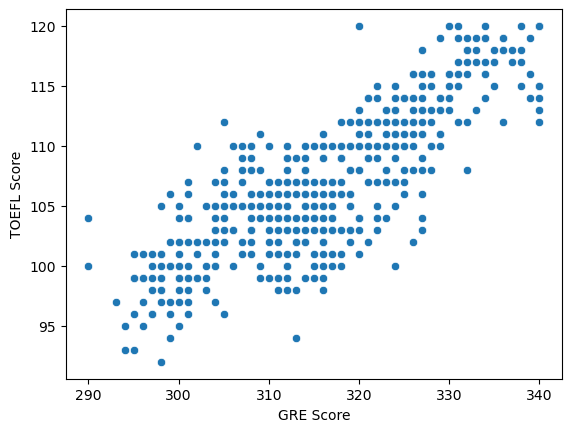

In [147]:
sns.scatterplot(data=df,x='GRE Score', y='TOEFL Score')

- True, Correlation Between GRE and TOEFL is ~83%

### 2. A student with a higher CGPA has a good LOR. (T/F)

<AxesSubplot:xlabel='LOR ', ylabel='CGPA'>

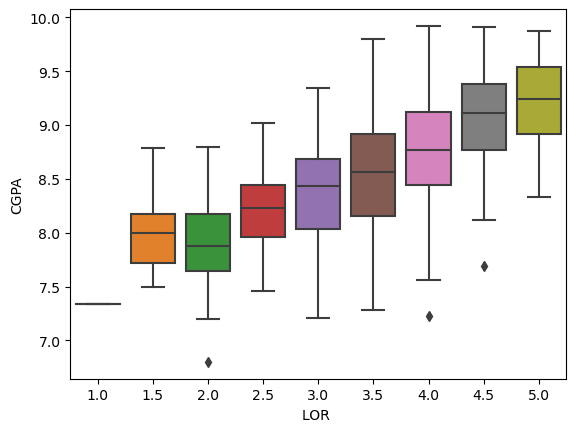

In [148]:
sns.boxplot(data= df, x='LOR ', y='CGPA')

- True, Boxplot suggest the same

### 3. What are the top 3 correlated features with the Chance of Admit?

In [149]:
df.corr().iloc[:,-1:].sort_values(by='Chance of Admit ', ascending=False).iloc[1:4,:].round(2)

,Chance of Admit
CGPA,0.88
GRE Score,0.81
TOEFL Score,0.79


Top 3 Feature correlated with chance of admit:
- CGPA
- GRE Score
- TOEFL Score

### 4. Research experience for sure increases a student’s..
    a. Chance of Admit
    b. LOR
    c. University Rating

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

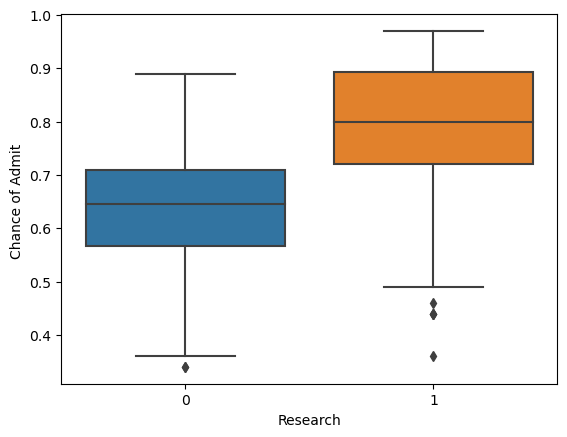

In [150]:
sns.boxplot(data=df, x= 'Research', y='Chance of Admit ')

In [151]:
# Hypothesis

# H0: Reasearch doesn't affect chance of Admit
# Ha: Reasearch does affect chance of Admit

research_1 = jb[jb['Research']==1]['Chance of Admit ']
research_0 = jb[jb['Research']==0]['Chance of Admit ']

In [152]:
np.mean(research_1), np.mean(research_0)

(0.7899642857142857, 0.634909090909091)

In [153]:
from scipy.stats import ttest_ind
tstat, pvalue = ttest_ind(research_1,research_0, alternative='greater')
pvalue

1.7977467729204891e-40

**Research has affact on chance of Admit**

<AxesSubplot:xlabel='Research', ylabel='LOR '>

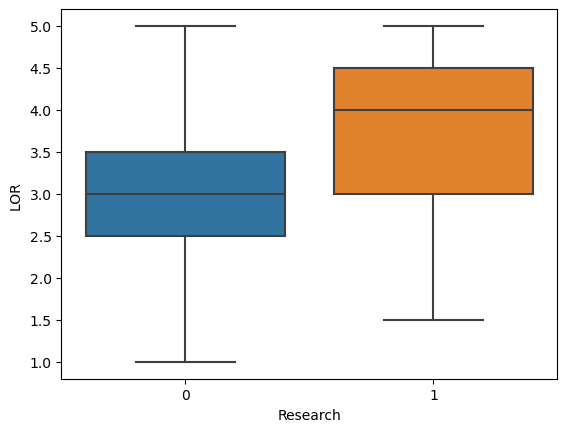

In [154]:
sns.boxplot(data=jb, x= 'Research', y='LOR ')

In [155]:
# Hypothesis

# H0: Reasearch doesn't affect LOR
# Ha: Reasearch does affect LOR

research_1_LOR = jb[jb['Research']==1]['LOR ']
research_0_LOR = jb[jb['Research']==0]['LOR ']

In [156]:
np.mean(research_1_LOR), np.mean(research_0_LOR)

(3.789285714285714, 3.0954545454545452)

In [157]:
from scipy.stats import ttest_ind
tstat, pvalue = ttest_ind(research_1_LOR,research_0_LOR, alternative='greater')
pvalue

3.3089302872191066e-18

**Research has affact on LOR**

In [158]:
jb.groupby(['Research'])['University Rating'].mean()

Research
0    2.563636
1    3.546429
Name: University Rating, dtype: float64

<AxesSubplot:xlabel='Research', ylabel='University Rating'>

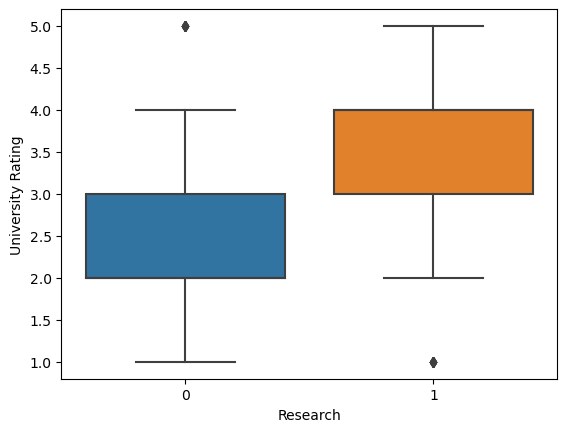

In [159]:
sns.boxplot(data=jb, x= 'Research', y='University Rating')

In [160]:
# Hypothesis

# H0: Reasearch doesn't affect LOR
# Ha: Reasearch does affect LOR

research_1_UR = jb[jb['Research']==1]['University Rating']
research_0_UR = jb[jb['Research']==0]['University Rating']

In [161]:
np.mean(research_1_UR), np.mean(research_0_UR)

(3.5464285714285713, 2.5636363636363635)

In [162]:
from scipy.stats import ttest_ind
tstat, pvalue = ttest_ind(research_1_UR,research_0_UR, alternative='greater')
pvalue

6.990378237923489e-24

**Research has affact on University Rating**

- True, Research experience increases the Chance of Admit, LOR, and University Rating

### 5. State the difference between R Squared and Adjusted R Squared.

R-squared (R²) and Adjusted R-squared are both metrics used to evaluate the goodness of fit of a regression model. They provide information about the proportion of variance in the dependent variable that is explained by the independent variables in the model. However, Adjusted R-squared is a modification of R-squared that takes into account the number of predictors in the model.

1. **R-squared (R²):**
   - R-squared is a measure of the proportion of the variance in the dependent variable that is explained by the independent variables in the model. It is calculated as the ratio of the sum of squared differences between the predicted and actual values to the total sum of squared differences from the mean of the dependent variable. The formula for R-squared is:
     $$ R^2 = 1 - \frac{\text{SSR}}{\text{SST}} $$
     where SSR is the sum of squared residuals (the sum of squared differences between predicted and actual values), and SST is the total sum of squared differences from the mean of the dependent variable.

   - R-squared ranges from 0 to 1, where 0 indicates that the model does not explain any variability in the dependent variable, and 1 indicates that the model explains all the variability.

2. **Adjusted R-squared:**
   - Adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in the model. While R-squared tends to increase as more predictors are added, even if they do not improve the model significantly, Adjusted R-squared penalizes the inclusion of irrelevant variables.
   - The formula for Adjusted R-squared is:
     $$ \text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - k - 1} \right) $$
     where $n$ is the number of observations, and $k$ is the number of predictors.

   - Adjusted R-squared ranges from -∞ to 1 and can be negative if the model is worse than a model with no predictors. It provides a more realistic assessment of the model's explanatory power, especially when dealing with multiple predictors.

**Key Difference:**
- R-squared gives a measure of the overall fit of the model, but it does not account for the number of predictors.
- Adjusted R-squared adjusts R-squared for the number of predictors, penalizing the inclusion of unnecessary variables and providing a more accurate measure of the model's goodness of fit in the presence of multiple predictors.


### 6. State the difference between Ridge and Lasso.

Ridge Regression and Lasso Regression are both techniques used in linear regression to handle the problem of multicollinearity and prevent overfitting. The key difference between Ridge and Lasso lies in the regularization term added to the linear regression cost function.

1. **Ridge Regression:**
   - Ridge Regression, also known as Tikhonov regularization, adds a regularization term to the linear regression cost function that is proportional to the square of the magnitude of the coefficients.
   - The Ridge Regression objective function is given by:
     $$J_{\text{ridge}}(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} \theta_i^2$$
   - Here, $\theta$ represents the vector of regression coefficients, $\text{MSE}(\theta)$ is the Mean Squared Error (the standard linear regression cost function), and $\alpha$ is the regularization parameter. The regularization term $\alpha \sum_{i=1}^{n} \theta_i^2$ penalizes large coefficients and tends to shrink them toward zero.

2. **Lasso Regression:**
   - Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds a regularization term to the linear regression cost function that is proportional to the absolute value of the magnitude of the coefficients.
   - The Lasso Regression objective function is given by:
     $$ J_{\text{lasso}}(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} |\theta_i|$$ 
   - Similar to Ridge, $\theta$ represents the vector of regression coefficients, $\text{MSE}(\theta)$ is the Mean Squared Error, and $\alpha$ is the regularization parameter. The regularization term $\alpha \sum_{i=1}^{n} |\theta_i|$ has the effect of encouraging sparsity in the coefficient vector by driving some coefficients to exactly zero.

**Key Difference:**
- The main difference between Ridge and Lasso is in the shape of the regularization term. Ridge uses the square of the coefficients, while Lasso uses the absolute value of the coefficients.
- Consequently, Ridge tends to shrink the coefficients toward zero but may not set them exactly to zero, while Lasso can lead to sparse models by setting some coefficients to exactly zero, effectively performing feature selection.

Choosing between Ridge and Lasso depends on the specific characteristics of the dataset and the desired properties of the model. Ridge is often preferred when all features are expected to contribute, while Lasso is useful when there is a belief that only a subset of features is relevant.

### 7. Define MSE and MAE.

MSE (Mean Squared Error) and MAE (Mean Absolute Error) are both metrics commonly used to evaluate the performance of a predictive model, particularly in the context of regression analysis, where the goal is to predict a continuous variable.

1. **Mean Squared Error (MSE):**
   - MSE is calculated by taking the average of the squared differences between the predicted and actual values.
   - The formula for MSE is:
     $$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
     where $n$ is the number of data points, $y_i$ is the actual value, and $\hat{y}_i$ is the predicted value.

   - Squaring the differences has the effect of penalizing larger errors more heavily than smaller ones. The resulting value is always non-negative, and a lower MSE indicates better model performance.

2. **Mean Absolute Error (MAE):**
   - MAE is calculated by taking the average of the absolute differences between the predicted and actual values.
   - The formula for MAE is:
     $$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$
     where $n$ is the number of data points, $y_i$ is the actual value, and $\hat{y}_i$ is the predicted value.

   - MAE is less sensitive to outliers compared to MSE since it does not involve squaring the errors. It provides a more straightforward representation of the average magnitude of errors.

In both cases, a lower value indicates better model performance. The choice between MSE and MAE depends on the specific characteristics of the problem at hand and the desired properties of the error metric. MSE is more sensitive to large errors, while MAE gives equal weight to all errors.

### 8. What are the basic assumptions for a Linear Regression model?
Linear regression makes several assumptions about the data and the relationship between the independent and dependent variables. It's important to be aware of these assumptions when using linear regression, as violations of these assumptions can affect the validity and reliability of the model. The basic assumptions for a linear regression model are:

1. **Linearity:** The relationship between the independent variables (predictors) and the dependent variable (response) is assumed to be linear. This means that the change in the dependent variable is a constant times the change in an independent variable, holding all other variables constant.

2. **Independence of Residuals:** The residuals (the differences between the observed and predicted values) should be independent of each other. In other words, there should be no systematic pattern in the residuals. Independence of residuals is crucial for the validity of statistical inferences.

3. **Homoscedasticity (Constant Variance of Residuals):** The variance of the residuals should be constant across all levels of the independent variables. In simpler terms, the spread of residuals should be roughly the same throughout the range of predicted values. If the spread of residuals increases or decreases systematically with the predicted values, it indicates heteroscedasticity.

4. **Normality of Residuals:** The residuals are assumed to be normally distributed. While this assumption is not critical for large sample sizes due to the Central Limit Theorem, it can be important for smaller sample sizes. Normality of residuals is often checked using diagnostic plots or statistical tests.

5. **No Perfect Multicollinearity:** There should not be perfect linear relationships among the independent variables (multicollinearity). Perfect multicollinearity occurs when one independent variable can be perfectly predicted from another or a combination of others, leading to numerical instability in estimating the coefficients.

6. **No Endogeneity:** The independent variables are assumed to be exogenous, meaning they are not influenced by the errors in the model. Endogeneity can lead to biased and inconsistent parameter estimates.

7. **No Autocorrelation of Residuals:** The residuals are assumed to be independent of each other over time (in the case of time series data) or across observations. Autocorrelation, or serial correlation, occurs when there is a correlation between the residuals at different time points or observations.

It's essential to assess these assumptions using diagnostic tools and statistical tests to ensure the reliability of the linear regression model and to consider alternative models or transformations if the assumptions are violated.

# 6. Actionable Insights & Recommendations (10 Points)

## 6.1. Actionable Insights

In [163]:
weights

,Features,Coef
0,Intercept,0.722107
6,CGPA,0.068731
1,GRE Score,0.023858
2,TOEFL Score,0.016953
5,LOR,0.016787
7,Research,0.013686
3,University Rating,0.005630
4,SOP,0.001727


**a. Comments on significance of predictor variables**

``` Chance of Admit = 0.72 + 0.02*GRE + 0.017*TOEFL + 0.006*UniRating + 0.002*SOP + 0.017*LOR + 0.069*CGPA + 0.014*Research ```

<font color = darkcyan>
<b>

* The target variable (Chance of Admit) is numerical.
* We don't have Outliers in the dataset.
* The distribution of the numerical feature isn't normally distributed.
* The distribution of target variable (chances of admit) is left-skewed
* There is a linear relationship between the numerical features and the target.
* There is a higher probability of getting admission (Chance of Admit) with a good LOR,  good SOP, good University Rating, and having Research. 
* The features are correlated with the target variables.
* There is a linear relationship between features and the target.
* No autocorrelation.
* L1 regularisation (Lasso Model) fits the best of all the models. Thus, is our final model
* All the models have captured upto 83% of the variance in the target variable (chance of admit).
* The equation suggest  **```'CGPA', 'GRE Score', 'TOEFL Score', and 'LOR'```** are the Top predictor features while **`'SOP' and 'University Rating'`** features are not much helping in the performance of the model

## 6.2. Recommendations

<font color = darkcyan>
<b>

- To improve the predictability, it is recommended to add more independent features like acadmic profile, work experience, internships, mock interview performance, extracurricular activities or diversity.
- Applicant to focus more on their GRE, TOEFL scores, LOR and Research experience.

Business Benefits from Model Refinement:
- Personalized Counseling: Tailored advice based on model predictions can enhance student success rates.
- Strategic Course Design: Target courses based on the most impactful factors for admission.
- Monetization: Offer predictive insights as a premium feature, adding a revenue stream for Jamboree.